# GetBiologicalData

Gets required additional biological data from BioCyc for Arabidopsis thaliana

Assumes BioCyc pathway-tools is running locally and appropriate PGDB has been imported

./pathway-tools -lisp -python-local-only

Uses the pythoncyc package to access pathway-tools

Import pythoncyc

In [148]:
import pythoncyc

In [149]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Connect to pathway-tools and specify species

In [150]:
ara = pythoncyc.select_organism('ara')

Load time-series data file

In [151]:
arr_data_pd = pd.read_csv("./Data/Arabidopsis-T87-timeseries-NaCl-by-metabolite-BioCyc-Master-SOM.csv")

In [152]:
arr_data_pd.head(5)

,BioCyC Name,Metabolite,0.5,1,2,4,12,24,48,72
0,PYRUVATE,Pyruvate,1.19,1.32,0.86,0.68,0.54,1.84,3.23,3.63
1,LACTATE,Lactate,0.87,1.26,0.98,0.67,0.53,4.94,3.67,12.75
2,ETHANOL-AMINE,Ethanolamine,1.31,1.45,1.18,1.22,0.52,0.59,0.31,0.26
3,GLYCEROL,Glycerol,1.61,0.72,0.68,1.91,1.42,3.30,0.90,1.40
4,SUC,Succinate,0.75,1.08,0.80,0.55,0.39,0.21,0.87,1.62


Extract first column of BioCyC metabolite names

In [153]:
compounds = arr_data_pd["BioCyC Name"].tolist()
compounds

['PYRUVATE',
 'LACTATE',
 'ETHANOL-AMINE',
 'GLYCEROL',
 'SUC',
 'GLYCERATE',
 'FUM',
 'CADAVERINE',
 'MAL',
 '4-AMINO-BUTYRATE',
 'CYS',
 '2-KETOGLUTARATE',
 'CIS-ACONITATE',
 'PUTRESCINE',
 'SHIKIMATE',
 'CIT',
 'FRU',
 'GLUCOSE',
 'LYS',
 'TYR',
 'GLUCONATE',
 'CPD0-1083',
 'URATE',
 'SUCROSE',
 'TREHALOSE',
 'L-ASPARTATE',
 'ASN',
 'SER',
 'GLY',
 'L-ALPHA-ALANINE',
 'GLT',
 'GLN',
 'THR',
 'PRO',
 'VAL',
 'TRP',
 'ILE',
 'LEU',
 'PHE',
 'FORMATE',
 'FOLATES']

Create empty numpy array for common pathways and common enzymes

In [196]:
rows, cols = (len(compounds), len(compounds))
common_pathways = pd.DataFrame(np.zeros((rows, cols)), dtype = int)
common_enzymes = pd.DataFrame(np.zeros((rows, cols)), dtype = int)
common_genes = pd.DataFrame(np.zeros((rows, cols)), dtype = int)
common_reactions = pd.DataFrame(np.zeros((rows, cols)), dtype = int)

Calculate common pathways between every pair of compounds

No data for lactate or glucose so create exceptions

Use sets so easier to find intersection (common paths)

In [197]:
exceptions = {'LACTATE', 'GLUCOSE', 'FOLATES'}
for row in range(0, rows):
    for column in range(0, cols):
        if (row == column):
            common_pathways[row][column] = 0
            continue
        if compounds[column] in exceptions:
            common_pathways[row][column] = 0
            continue
        if compounds[row] in exceptions:
            common_pathways[row][column] = 0
            continue
        row_paths = set(ara.pathways_of_compound(compounds[row]))
        col_paths = set(ara.pathways_of_compound(compounds[column]))
        common_paths = row_paths.intersection(col_paths)
        common_pathways[row][column] = len(common_paths)
common_pathways.head(5)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,0,0,0,5,1,2,0,4,2,...,6,4,0,2,4,3,1,3,2,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,6,1,5,3,...,0,0,0,0,0,0,0,1,0,0


### Add metabolites as column and row identifiers

In [198]:
common_pathways.set_axis(compounds, axis=1, inplace=True)
common_pathways.set_axis([compounds], axis=0, inplace=True)
common_pathways.head(5)

,PYRUVATE,LACTATE,ETHANOL-AMINE,GLYCEROL,SUC,GLYCERATE,FUM,CADAVERINE,MAL,4-AMINO-BUTYRATE,...,GLN,THR,PRO,VAL,TRP,ILE,LEU,PHE,FORMATE,FOLATES
PYRUVATE,0,0,0,0,5,1,2,0,4,2,...,6,4,0,2,4,3,1,3,2,0
LACTATE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETHANOL-AMINE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GLYCEROL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SUC,5,0,0,0,0,0,6,1,5,3,...,0,0,0,0,0,0,0,1,0,0


Write common pathways to a file

In [188]:
common_pathways.to_csv("./Data/Arabidopsis-T87-timeseries-NaCl-by-metabolite-BioCyc-Master-Common-Pathways.csv", sep=",")

Plot distribution of number of common pathways

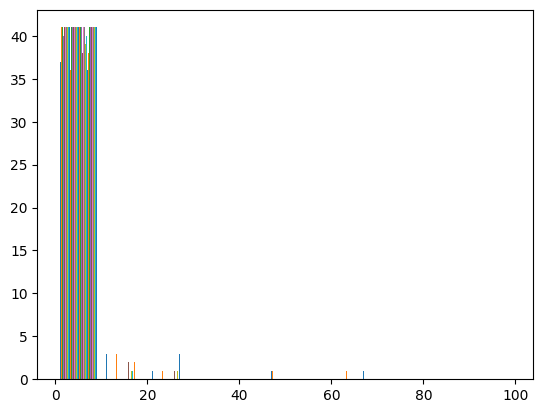

In [189]:
plt.hist(common_pathways, bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.show()

Calculate common enzymes between every pair of compounds

In [199]:
exceptions = {'LACTATE', 'GLUCOSE', 'FOLATES'}
for row in range(0, rows):
    for column in range(0, cols):
        if (row == column):
            common_enzymes[row][column] = 0
            continue
        if compounds[column] in exceptions:
            common_enzymes[row][column] = 0
            continue
        if compounds[row] in exceptions:
            common_enzymes[row][column] = 0
            continue
        total_row_ezys = set()
        row_paths = ara.pathways_of_compound(compounds[row])
        for path in row_paths:
            row_ezys = ara.enzymes_of_pathway(path)
            for ezy in row_ezys:
                if ezy not in total_row_ezys:
                    total_row_ezys.add(ezy)
        total_col_ezys = set()
        col_paths = ara.pathways_of_compound(compounds[column])
        for path in col_paths:
            col_ezys = ara.enzymes_of_pathway(path)
            for ezy in col_ezys:
                if ezy not in total_col_ezys:
                    total_col_ezys.add(ezy)
        common_enzymes[row][column] = len(total_row_ezys.intersection(total_col_ezys))
common_enzymes.head(5)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,0,0,0,128,15,116,0,145,11,...,109,60,2,20,87,38,20,68,27,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,128,0,0,0,0,1,368,3,123,11,...,15,3,0,1,1,0,1,26,3,0


### Add metabolites as column and row identifiers

In [200]:
common_enzymes.set_axis(compounds, axis=1, inplace=True)
common_enzymes.set_axis([compounds], axis=0, inplace=True)
common_enzymes.head(5)

,PYRUVATE,LACTATE,ETHANOL-AMINE,GLYCEROL,SUC,GLYCERATE,FUM,CADAVERINE,MAL,4-AMINO-BUTYRATE,...,GLN,THR,PRO,VAL,TRP,ILE,LEU,PHE,FORMATE,FOLATES
PYRUVATE,0,0,0,0,128,15,116,0,145,11,...,109,60,2,20,87,38,20,68,27,0
LACTATE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETHANOL-AMINE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GLYCEROL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SUC,128,0,0,0,0,1,368,3,123,11,...,15,3,0,1,1,0,1,26,3,0


Write common enzymes to a file

In [193]:
common_enzymes.to_csv("./Data/Arabidopsis-T87-timeseries-NaCl-by-metabolite-BioCyc-Master-Common-Enzymes.csv", sep=",")

Plot distribution of number of common enzymes

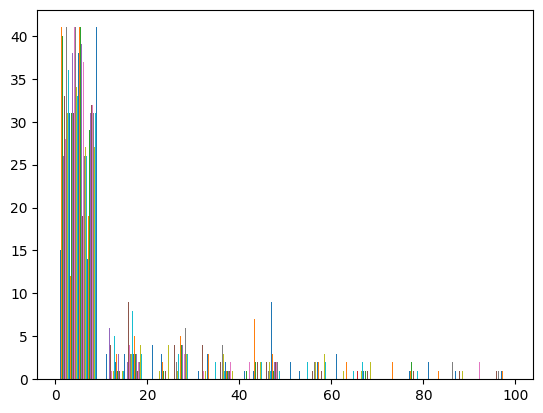

In [201]:
plt.hist(common_enzymes, bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.show()

Calculate common genes between every pair of compounds

In [194]:
exceptions = {'LACTATE', 'GLUCOSE', 'FOLATES'}
for row in range(0, rows):
    for column in range(0, cols):
        if (row == column):
            common_genes[row][column] = 0
            continue
        if compounds[column] in exceptions:
            common_genes[row][column] = 0
            continue
        if compounds[row] in exceptions:
            common_genes[row][column] = 0
            continue
        total_row_genes = set()
        row_paths = ara.pathways_of_compound(compounds[row])
        for path in row_paths:
            row_genes = ara.genes_of_pathway(path)
            for ezy in row_ezys:
                if ezy not in total_row_genes:
                    total_row_genes.add(ezy)
        total_col_genes = set()
        col_paths = ara.pathways_of_compound(compounds[column])
        for path in col_paths:
            col_genes = ara.genes_of_pathway(path)
            for ezy in col_genes:
                if ezy not in total_col_genes:
                    total_col_genes.add(ezy)
        #print(total_row_genes.intersection(total_col_genes))
        common_genes[row][column] = len(total_row_genes.intersection(total_col_genes))
common_genes.head(5)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


DISCUSS WITH ALEXEY

I wonder if this is an artefact of the way the data was created ... mapped genes to proteins with no overlap?


Calculate common reactions between every pair of compounds

In [202]:
exceptions = {'LACTATE', 'GLUCOSE', 'FOLATES'}
for row in range(0, rows):
    for column in range(0, cols):
        if (row == column):
            common_reactions[row][column] = 0
            continue
        if compounds[column] in exceptions:
            common_reactions[row][column] = 0
            continue
        if compounds[row] in exceptions:
            common_reactions[row][column] = 0
            continue
        total_row_reactions = set()
        row_paths = ara.pathways_of_compound(compounds[row])
        for path in row_paths:
            row_enzymes = ara.enzymes_of_pathway(path)
            for ezy in row_enzymes:
                row_reactions = ara.reactions_of_enzyme(ezy)
                for react in row_reactions:
                    if react not in total_row_reactions:
                        total_row_reactions.add(react)
        total_col_reactions = set()
        col_paths = ara.pathways_of_compound(compounds[column])
        for path in col_paths:
            col_enzymes = ara.enzymes_of_pathway(path)
            for ezy in col_enzymes:
                col_reactions = ara.reactions_of_enzyme(ezy)
                for react in col_reactions:
                    if react not in total_col_reactions:
                        total_col_reactions.add(react)
        common_reactions[row][column] = len(total_col_reactions.intersection(total_col_reactions))
common_genes.head(5)

KeyboardInterrupt: 